In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data_path = 'Nairobi Office Price Ex (2).csv'
data = pd.read_csv(data_path)

# Extract the necessary columns
X = data['SIZE'].values
y = data['PRICE'].values

In [10]:
# Normalize X for stability in gradient descent
X_norm = (X - np.mean(X)) / np.std(X)

In [11]:
#Mean Squared Error function
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [12]:
#Gradient Descent function
def gradient_descent(X, y, m, c, learning_rate, epochs):
    n = len(y)
    mse_history = []
    
    for epoch in range(epochs):
        y_pred = m * X + c
        mse = compute_mse(y, y_pred)
        mse_history.append(mse)
        
        dm = (-2/n) * sum(X * (y - y_pred))
        dc = (-2/n) * sum(y - y_pred)
        
        m -= learning_rate * dm
        c -= learning_rate * dc
    
    return m, c, mse_history


In [13]:
# Gradient Descent Parameters
m_init = np.random.randn()
c_init = np.random.randn()
learning_rate = 0.1  # learning rate
epochs = 10

In [14]:
# Train using Gradient Descent
m_trained, c_trained, mse_history = gradient_descent(X_norm, y, m_init, c_init, learning_rate, epochs)

In [15]:
#line of best fit using Least Squares formula
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
m_ls = numerator / denominator
c_ls = y_mean - m_ls * X_mean

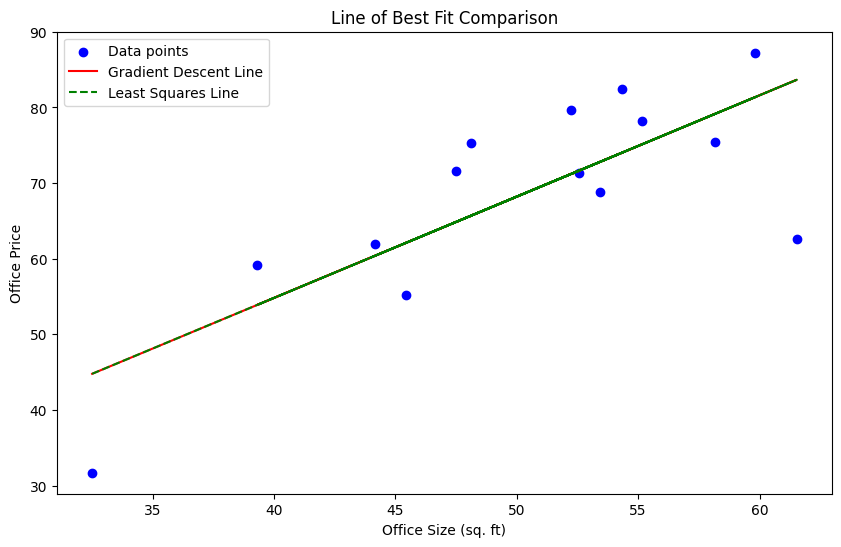

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, m_trained * X_norm + c_trained, color='red', label='Gradient Descent Line')
plt.plot(X, m_ls * X + c_ls, color='green', linestyle='--', label='Least Squares Line')
plt.xlabel('Office Size (sq. ft)')
plt.ylabel('Office Price')
plt.title('Line of Best Fit Comparison')
plt.legend()
plt.show()

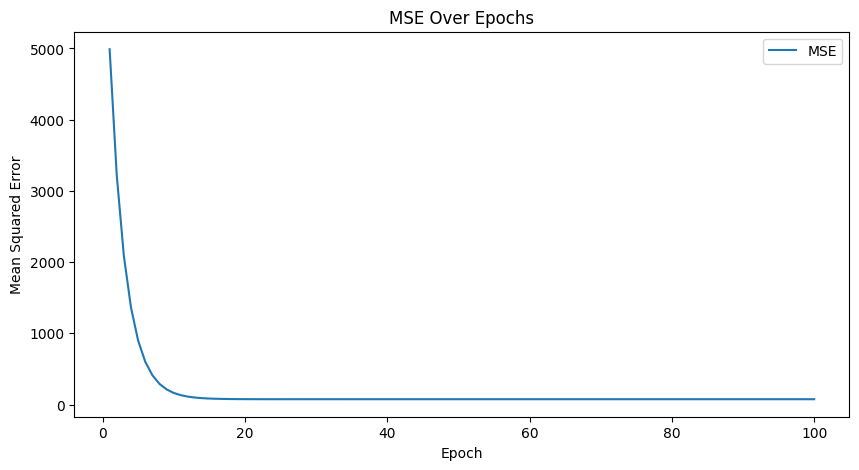

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Epochs')
plt.legend()
plt.show()

In [18]:
X_100_norm = (100 - np.mean(X)) / np.std(X)
predicted_price_gradient_descent = m_trained * X_100_norm + c_trained
predicted_price_least_squares = m_ls * 100 + c_ls

predicted_price_gradient_descent, predicted_price_least_squares

(135.15719779198417, 135.15719782193173)